# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

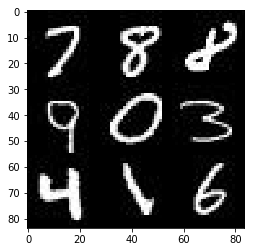

In [2]:
show_n_images = 15

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

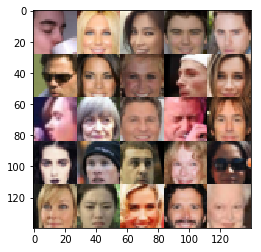

In [3]:
show_n_images = 30

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0


/home/aash/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    real_input_images = tf.placeholder(tf.float32, [None, image_width, image_height, image_channels], name = 'input_images')
    z_input = tf.placeholder(tf.float32, [None, z_dim], name = 'z_input')
    learning_rate = tf.placeholder(tf.float32, name = 'lr')

    return real_input_images, z_input, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope('discriminator', reuse=reuse):

        images1 = tf.layers.conv2d(images, 32, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * images1, images1)

        
        images2 = tf.layers.conv2d(relu1, 64, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(images2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)

        images3 = tf.layers.conv2d(relu2, 128, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(images3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)


        images4 = tf.layers.conv2d(relu3, 256, 5, strides=2, padding='same')
        bn4 = tf.layers.batch_normalization(images4, training=True)
        relu4 = tf.maximum(alpha * bn4, bn4)
    

        flat = tf.reshape(relu4, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope('generator', reuse = not is_train):

        x1 = tf.layers.dense(z, 4*4*512)
        x1 = tf.reshape(x1, (-1, 4, 4, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d_transpose(x1, 128, 4, strides=1, padding='valid')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        
        x3 = tf.layers.conv2d_transpose(x2, 64, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)

        x4 = tf.layers.conv2d_transpose(x3, 32, 5, strides=2, padding='same')
        x4 = tf.layers.batch_normalization(x4, training=is_train)
        x4 = tf.maximum(alpha * x4, x4)
        
        logits = tf.layers.conv2d_transpose(x4, out_channel_dim, 3, strides=1, padding='same')
        out = tf.tanh(logits)
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [10]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [11]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [12]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [13]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    print_every = 10
    show_every = 100
    step = 0
    
    samples, width, height, channels = data_shape
    
    input_real, input_z, lr = model_inputs(width, height, channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, channels)
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    saver = tf.train.Saver()

    steps = 0
    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                batch_images = batch_images * 2.0

                # Run optimizers
                sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                sess.run(g_train_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                
                steps += 1
                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_real: batch_images, input_z: batch_z})
                    train_loss_g = g_loss.eval({input_real: batch_images, input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, 16, input_z, channels, data_image_mode)

                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.9152... Generator Loss: 1.3350
Epoch 1/2... Discriminator Loss: 2.6221... Generator Loss: 0.0933
Epoch 1/2... Discriminator Loss: 0.2559... Generator Loss: 2.1368
Epoch 1/2... Discriminator Loss: 1.4552... Generator Loss: 0.8133
Epoch 1/2... Discriminator Loss: 2.0366... Generator Loss: 0.1888
Epoch 1/2... Discriminator Loss: 1.7557... Generator Loss: 0.2535
Epoch 1/2... Discriminator Loss: 1.6212... Generator Loss: 0.2508
Epoch 1/2... Discriminator Loss: 0.3458... Generator Loss: 2.3791
Epoch 1/2... Discriminator Loss: 1.4488... Generator Loss: 0.3332
Epoch 1/2... Discriminator Loss: 1.2521... Generator Loss: 0.5593


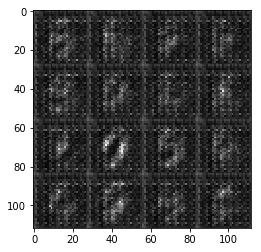

Epoch 1/2... Discriminator Loss: 0.8366... Generator Loss: 1.0327
Epoch 1/2... Discriminator Loss: 0.8629... Generator Loss: 0.9108
Epoch 1/2... Discriminator Loss: 0.9530... Generator Loss: 0.8162
Epoch 1/2... Discriminator Loss: 1.3419... Generator Loss: 1.5686
Epoch 1/2... Discriminator Loss: 0.9694... Generator Loss: 0.6105
Epoch 1/2... Discriminator Loss: 0.8645... Generator Loss: 0.8757
Epoch 1/2... Discriminator Loss: 1.2814... Generator Loss: 0.5950
Epoch 1/2... Discriminator Loss: 0.9030... Generator Loss: 0.8763
Epoch 1/2... Discriminator Loss: 1.3925... Generator Loss: 2.1218
Epoch 1/2... Discriminator Loss: 0.9183... Generator Loss: 0.9108


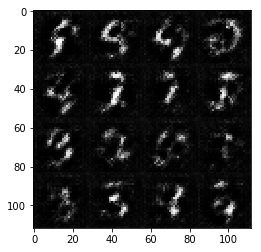

Epoch 1/2... Discriminator Loss: 0.9992... Generator Loss: 0.6562
Epoch 1/2... Discriminator Loss: 1.1917... Generator Loss: 0.5214
Epoch 1/2... Discriminator Loss: 0.8656... Generator Loss: 0.9045
Epoch 1/2... Discriminator Loss: 1.1060... Generator Loss: 0.5201
Epoch 1/2... Discriminator Loss: 1.6422... Generator Loss: 0.2835
Epoch 1/2... Discriminator Loss: 1.3940... Generator Loss: 0.4037
Epoch 1/2... Discriminator Loss: 1.7095... Generator Loss: 0.2474
Epoch 1/2... Discriminator Loss: 1.1278... Generator Loss: 1.0744
Epoch 1/2... Discriminator Loss: 0.7734... Generator Loss: 0.8244
Epoch 1/2... Discriminator Loss: 0.9245... Generator Loss: 0.7168


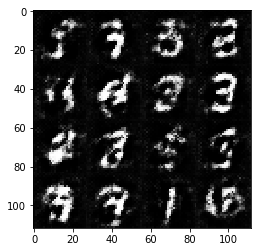

Epoch 1/2... Discriminator Loss: 0.8324... Generator Loss: 1.2779
Epoch 1/2... Discriminator Loss: 1.1570... Generator Loss: 0.4566
Epoch 1/2... Discriminator Loss: 1.1035... Generator Loss: 2.3101
Epoch 1/2... Discriminator Loss: 0.7534... Generator Loss: 1.0767
Epoch 1/2... Discriminator Loss: 0.9300... Generator Loss: 0.6600
Epoch 1/2... Discriminator Loss: 0.8395... Generator Loss: 1.0235
Epoch 1/2... Discriminator Loss: 0.8421... Generator Loss: 1.0543
Epoch 1/2... Discriminator Loss: 0.8257... Generator Loss: 2.2219
Epoch 1/2... Discriminator Loss: 0.9818... Generator Loss: 0.6607
Epoch 1/2... Discriminator Loss: 0.7190... Generator Loss: 1.5673


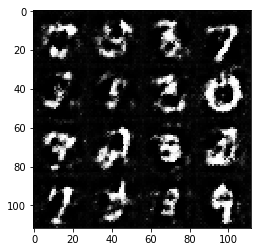

Epoch 1/2... Discriminator Loss: 0.8412... Generator Loss: 0.8824
Epoch 1/2... Discriminator Loss: 1.2014... Generator Loss: 2.6202
Epoch 1/2... Discriminator Loss: 0.7688... Generator Loss: 1.4053
Epoch 1/2... Discriminator Loss: 0.8971... Generator Loss: 1.7452
Epoch 1/2... Discriminator Loss: 1.2731... Generator Loss: 2.8719
Epoch 1/2... Discriminator Loss: 0.9313... Generator Loss: 0.8003
Epoch 1/2... Discriminator Loss: 1.1129... Generator Loss: 0.5698
Epoch 1/2... Discriminator Loss: 0.8833... Generator Loss: 0.8737
Epoch 1/2... Discriminator Loss: 1.0051... Generator Loss: 0.7613
Epoch 1/2... Discriminator Loss: 1.5917... Generator Loss: 0.2628


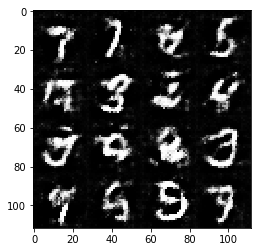

Epoch 1/2... Discriminator Loss: 0.9723... Generator Loss: 0.7513
Epoch 1/2... Discriminator Loss: 1.0167... Generator Loss: 1.0324
Epoch 1/2... Discriminator Loss: 0.7737... Generator Loss: 1.0378
Epoch 1/2... Discriminator Loss: 1.5202... Generator Loss: 0.2950
Epoch 1/2... Discriminator Loss: 1.0444... Generator Loss: 0.6817
Epoch 1/2... Discriminator Loss: 0.8524... Generator Loss: 0.8343
Epoch 1/2... Discriminator Loss: 0.9605... Generator Loss: 0.7851
Epoch 1/2... Discriminator Loss: 1.1310... Generator Loss: 0.5420
Epoch 1/2... Discriminator Loss: 0.6951... Generator Loss: 1.4769
Epoch 1/2... Discriminator Loss: 0.7865... Generator Loss: 1.0991


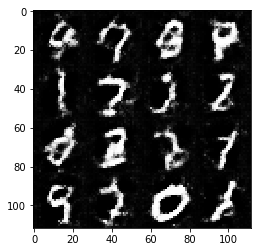

Epoch 1/2... Discriminator Loss: 0.7892... Generator Loss: 1.0661
Epoch 1/2... Discriminator Loss: 1.0249... Generator Loss: 0.7254
Epoch 1/2... Discriminator Loss: 1.0837... Generator Loss: 1.3846
Epoch 1/2... Discriminator Loss: 0.9785... Generator Loss: 0.6557
Epoch 1/2... Discriminator Loss: 1.0965... Generator Loss: 0.5231
Epoch 1/2... Discriminator Loss: 0.8111... Generator Loss: 0.7513
Epoch 1/2... Discriminator Loss: 0.9272... Generator Loss: 1.0467
Epoch 1/2... Discriminator Loss: 1.0375... Generator Loss: 0.9461
Epoch 1/2... Discriminator Loss: 1.0007... Generator Loss: 0.7955
Epoch 1/2... Discriminator Loss: 0.9040... Generator Loss: 0.9880


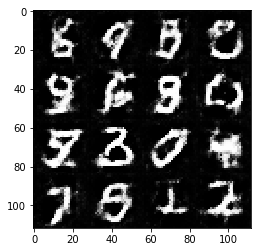

Epoch 1/2... Discriminator Loss: 1.2003... Generator Loss: 0.5156
Epoch 1/2... Discriminator Loss: 0.7973... Generator Loss: 1.3905
Epoch 1/2... Discriminator Loss: 0.9862... Generator Loss: 1.8037
Epoch 1/2... Discriminator Loss: 0.9406... Generator Loss: 0.6797
Epoch 1/2... Discriminator Loss: 0.7637... Generator Loss: 0.9434
Epoch 1/2... Discriminator Loss: 0.8452... Generator Loss: 1.6388
Epoch 1/2... Discriminator Loss: 0.8426... Generator Loss: 1.2911
Epoch 1/2... Discriminator Loss: 0.9590... Generator Loss: 1.3750
Epoch 1/2... Discriminator Loss: 1.5042... Generator Loss: 0.2777
Epoch 1/2... Discriminator Loss: 1.0631... Generator Loss: 0.6113


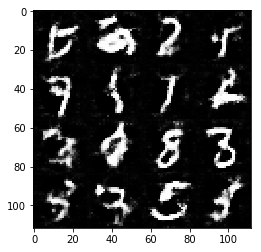

Epoch 1/2... Discriminator Loss: 0.7549... Generator Loss: 1.2119
Epoch 1/2... Discriminator Loss: 0.9114... Generator Loss: 1.8921
Epoch 1/2... Discriminator Loss: 1.1863... Generator Loss: 0.4321
Epoch 1/2... Discriminator Loss: 1.1570... Generator Loss: 0.4983
Epoch 1/2... Discriminator Loss: 0.8336... Generator Loss: 0.7493
Epoch 1/2... Discriminator Loss: 0.9558... Generator Loss: 0.6717
Epoch 1/2... Discriminator Loss: 1.6231... Generator Loss: 0.2361
Epoch 1/2... Discriminator Loss: 1.0738... Generator Loss: 0.5974
Epoch 1/2... Discriminator Loss: 0.7744... Generator Loss: 0.9585
Epoch 1/2... Discriminator Loss: 0.9764... Generator Loss: 0.9597


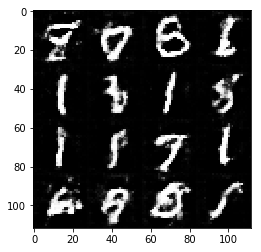

Epoch 1/2... Discriminator Loss: 1.2692... Generator Loss: 0.4102
Epoch 1/2... Discriminator Loss: 0.6206... Generator Loss: 1.4983
Epoch 1/2... Discriminator Loss: 1.3775... Generator Loss: 0.3332
Epoch 2/2... Discriminator Loss: 1.1836... Generator Loss: 0.5175
Epoch 2/2... Discriminator Loss: 0.9136... Generator Loss: 0.7705
Epoch 2/2... Discriminator Loss: 0.7677... Generator Loss: 1.5069
Epoch 2/2... Discriminator Loss: 1.9525... Generator Loss: 0.1678
Epoch 2/2... Discriminator Loss: 1.2004... Generator Loss: 0.4464
Epoch 2/2... Discriminator Loss: 1.3065... Generator Loss: 0.3827
Epoch 2/2... Discriminator Loss: 0.7881... Generator Loss: 0.8417


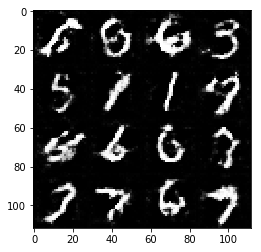

Epoch 2/2... Discriminator Loss: 0.7514... Generator Loss: 1.0892
Epoch 2/2... Discriminator Loss: 1.0194... Generator Loss: 0.6500
Epoch 2/2... Discriminator Loss: 1.4368... Generator Loss: 0.3691
Epoch 2/2... Discriminator Loss: 1.3192... Generator Loss: 0.3996
Epoch 2/2... Discriminator Loss: 0.7725... Generator Loss: 1.0079
Epoch 2/2... Discriminator Loss: 1.7475... Generator Loss: 0.2248
Epoch 2/2... Discriminator Loss: 1.5606... Generator Loss: 3.1459
Epoch 2/2... Discriminator Loss: 0.6934... Generator Loss: 1.2838
Epoch 2/2... Discriminator Loss: 2.1355... Generator Loss: 0.1515
Epoch 2/2... Discriminator Loss: 0.4685... Generator Loss: 1.5103


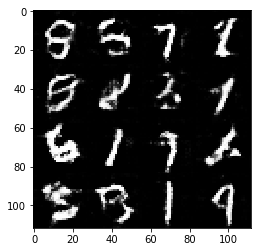

Epoch 2/2... Discriminator Loss: 1.3807... Generator Loss: 0.4185
Epoch 2/2... Discriminator Loss: 1.2044... Generator Loss: 0.4692
Epoch 2/2... Discriminator Loss: 1.7516... Generator Loss: 0.2361
Epoch 2/2... Discriminator Loss: 0.7524... Generator Loss: 0.8819
Epoch 2/2... Discriminator Loss: 0.7815... Generator Loss: 1.0241
Epoch 2/2... Discriminator Loss: 0.9548... Generator Loss: 0.8851
Epoch 2/2... Discriminator Loss: 1.0131... Generator Loss: 2.8402
Epoch 2/2... Discriminator Loss: 1.0399... Generator Loss: 0.6268
Epoch 2/2... Discriminator Loss: 1.2424... Generator Loss: 0.4443
Epoch 2/2... Discriminator Loss: 0.5681... Generator Loss: 1.8367


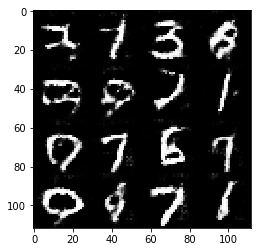

Epoch 2/2... Discriminator Loss: 0.6072... Generator Loss: 1.6887
Epoch 2/2... Discriminator Loss: 0.7690... Generator Loss: 1.9924
Epoch 2/2... Discriminator Loss: 1.4809... Generator Loss: 0.3111
Epoch 2/2... Discriminator Loss: 1.0094... Generator Loss: 1.1080
Epoch 2/2... Discriminator Loss: 0.7869... Generator Loss: 0.9065
Epoch 2/2... Discriminator Loss: 0.8446... Generator Loss: 1.0214
Epoch 2/2... Discriminator Loss: 0.9633... Generator Loss: 0.7115
Epoch 2/2... Discriminator Loss: 6.6554... Generator Loss: 7.7599
Epoch 2/2... Discriminator Loss: 0.9140... Generator Loss: 1.1894
Epoch 2/2... Discriminator Loss: 1.2854... Generator Loss: 0.4556


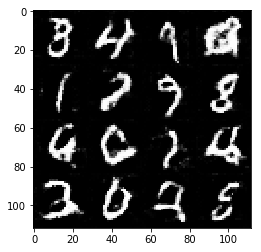

Epoch 2/2... Discriminator Loss: 1.0190... Generator Loss: 0.5853
Epoch 2/2... Discriminator Loss: 0.8395... Generator Loss: 1.7581
Epoch 2/2... Discriminator Loss: 0.6778... Generator Loss: 0.8953
Epoch 2/2... Discriminator Loss: 1.0327... Generator Loss: 0.5845
Epoch 2/2... Discriminator Loss: 1.0797... Generator Loss: 0.6456
Epoch 2/2... Discriminator Loss: 0.7452... Generator Loss: 1.1366
Epoch 2/2... Discriminator Loss: 1.0331... Generator Loss: 0.5889
Epoch 2/2... Discriminator Loss: 1.8505... Generator Loss: 0.2311
Epoch 2/2... Discriminator Loss: 1.2671... Generator Loss: 0.4159
Epoch 2/2... Discriminator Loss: 0.7584... Generator Loss: 1.3401


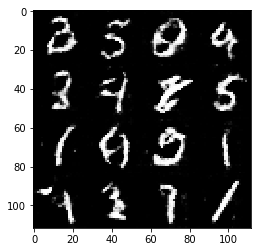

Epoch 2/2... Discriminator Loss: 1.2082... Generator Loss: 0.5736
Epoch 2/2... Discriminator Loss: 0.9716... Generator Loss: 0.6906
Epoch 2/2... Discriminator Loss: 1.6584... Generator Loss: 0.2731
Epoch 2/2... Discriminator Loss: 0.5408... Generator Loss: 1.6984
Epoch 2/2... Discriminator Loss: 2.4731... Generator Loss: 0.0957
Epoch 2/2... Discriminator Loss: 0.8465... Generator Loss: 0.8613
Epoch 2/2... Discriminator Loss: 1.3612... Generator Loss: 0.3919
Epoch 2/2... Discriminator Loss: 0.8700... Generator Loss: 0.7465
Epoch 2/2... Discriminator Loss: 1.8013... Generator Loss: 2.8136
Epoch 2/2... Discriminator Loss: 0.8527... Generator Loss: 0.7830


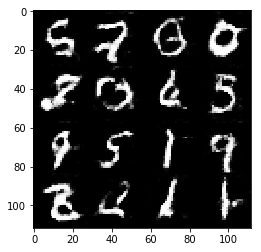

Epoch 2/2... Discriminator Loss: 0.9130... Generator Loss: 0.7139
Epoch 2/2... Discriminator Loss: 1.2914... Generator Loss: 0.4381
Epoch 2/2... Discriminator Loss: 2.8439... Generator Loss: 0.0928
Epoch 2/2... Discriminator Loss: 1.1821... Generator Loss: 0.5086
Epoch 2/2... Discriminator Loss: 0.8677... Generator Loss: 0.6922
Epoch 2/2... Discriminator Loss: 0.8405... Generator Loss: 0.8019
Epoch 2/2... Discriminator Loss: 0.7882... Generator Loss: 0.9623
Epoch 2/2... Discriminator Loss: 0.9695... Generator Loss: 0.8103
Epoch 2/2... Discriminator Loss: 0.9091... Generator Loss: 0.7461
Epoch 2/2... Discriminator Loss: 1.3378... Generator Loss: 0.3549


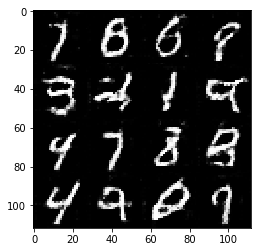

Epoch 2/2... Discriminator Loss: 1.2409... Generator Loss: 0.5056
Epoch 2/2... Discriminator Loss: 0.7014... Generator Loss: 0.9297
Epoch 2/2... Discriminator Loss: 1.8081... Generator Loss: 0.2136
Epoch 2/2... Discriminator Loss: 1.0371... Generator Loss: 1.3233
Epoch 2/2... Discriminator Loss: 0.5790... Generator Loss: 1.4490
Epoch 2/2... Discriminator Loss: 1.3173... Generator Loss: 0.3650
Epoch 2/2... Discriminator Loss: 0.9473... Generator Loss: 0.7685
Epoch 2/2... Discriminator Loss: 0.7436... Generator Loss: 0.8357
Epoch 2/2... Discriminator Loss: 0.6621... Generator Loss: 1.2624
Epoch 2/2... Discriminator Loss: 0.6824... Generator Loss: 0.9985


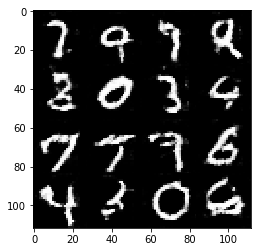

Epoch 2/2... Discriminator Loss: 1.8270... Generator Loss: 0.2216
Epoch 2/2... Discriminator Loss: 0.7031... Generator Loss: 0.9612
Epoch 2/2... Discriminator Loss: 1.0824... Generator Loss: 0.6046
Epoch 2/2... Discriminator Loss: 0.9216... Generator Loss: 0.7387
Epoch 2/2... Discriminator Loss: 0.9751... Generator Loss: 0.6386
Epoch 2/2... Discriminator Loss: 0.7041... Generator Loss: 0.8274
Epoch 2/2... Discriminator Loss: 0.6044... Generator Loss: 1.4007
Epoch 2/2... Discriminator Loss: 0.7503... Generator Loss: 2.0499
Epoch 2/2... Discriminator Loss: 1.3326... Generator Loss: 0.4220
Epoch 2/2... Discriminator Loss: 1.4762... Generator Loss: 0.3198


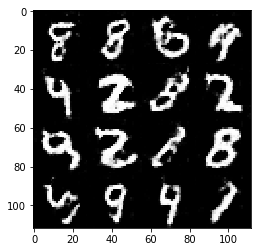

Epoch 2/2... Discriminator Loss: 0.7940... Generator Loss: 0.8604
Epoch 2/2... Discriminator Loss: 2.1848... Generator Loss: 0.1720
Epoch 2/2... Discriminator Loss: 1.0490... Generator Loss: 0.6130
Epoch 2/2... Discriminator Loss: 0.7925... Generator Loss: 0.9593
Epoch 2/2... Discriminator Loss: 1.1810... Generator Loss: 0.4761
Epoch 2/2... Discriminator Loss: 1.4416... Generator Loss: 0.3443
Epoch 2/2... Discriminator Loss: 1.1815... Generator Loss: 0.4911


In [14]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.45


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.3497... Generator Loss: 0.3919
Epoch 1/1... Discriminator Loss: 0.8361... Generator Loss: 0.7857
Epoch 1/1... Discriminator Loss: 1.0323... Generator Loss: 0.5987
Epoch 1/1... Discriminator Loss: 0.7633... Generator Loss: 0.7735
Epoch 1/1... Discriminator Loss: 0.4292... Generator Loss: 1.4193
Epoch 1/1... Discriminator Loss: 1.6940... Generator Loss: 0.2452
Epoch 1/1... Discriminator Loss: 0.1589... Generator Loss: 2.5144
Epoch 1/1... Discriminator Loss: 0.1674... Generator Loss: 3.1367
Epoch 1/1... Discriminator Loss: 0.0934... Generator Loss: 2.9129
Epoch 1/1... Discriminator Loss: 0.0612... Generator Loss: 5.5076


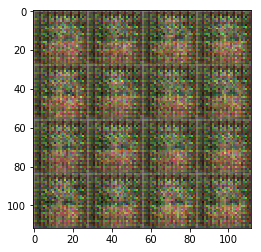

Epoch 1/1... Discriminator Loss: 0.3065... Generator Loss: 1.6473
Epoch 1/1... Discriminator Loss: 0.5913... Generator Loss: 1.0179
Epoch 1/1... Discriminator Loss: 0.2422... Generator Loss: 1.9358
Epoch 1/1... Discriminator Loss: 0.0208... Generator Loss: 6.1833
Epoch 1/1... Discriminator Loss: 0.0408... Generator Loss: 3.6358
Epoch 1/1... Discriminator Loss: 0.0848... Generator Loss: 3.2339
Epoch 1/1... Discriminator Loss: 0.8527... Generator Loss: 0.6662
Epoch 1/1... Discriminator Loss: 0.1050... Generator Loss: 4.8262
Epoch 1/1... Discriminator Loss: 0.1606... Generator Loss: 2.4699
Epoch 1/1... Discriminator Loss: 0.1036... Generator Loss: 3.1188


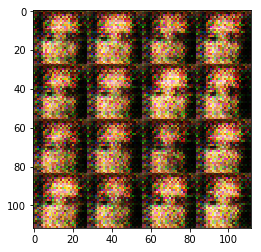

Epoch 1/1... Discriminator Loss: 0.2222... Generator Loss: 2.4169
Epoch 1/1... Discriminator Loss: 0.4939... Generator Loss: 1.3926
Epoch 1/1... Discriminator Loss: 1.3222... Generator Loss: 5.9406
Epoch 1/1... Discriminator Loss: 0.5455... Generator Loss: 1.1432
Epoch 1/1... Discriminator Loss: 1.0076... Generator Loss: 0.6091
Epoch 1/1... Discriminator Loss: 2.2595... Generator Loss: 0.1342
Epoch 1/1... Discriminator Loss: 0.2312... Generator Loss: 4.0443
Epoch 1/1... Discriminator Loss: 0.4251... Generator Loss: 1.4077
Epoch 1/1... Discriminator Loss: 0.8861... Generator Loss: 0.8200
Epoch 1/1... Discriminator Loss: 0.5652... Generator Loss: 1.3897


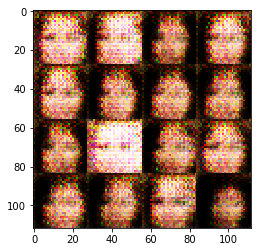

Epoch 1/1... Discriminator Loss: 0.5848... Generator Loss: 1.2518
Epoch 1/1... Discriminator Loss: 0.5643... Generator Loss: 1.4763
Epoch 1/1... Discriminator Loss: 0.6118... Generator Loss: 1.0817
Epoch 1/1... Discriminator Loss: 0.5303... Generator Loss: 1.3413
Epoch 1/1... Discriminator Loss: 1.3475... Generator Loss: 0.3929
Epoch 1/1... Discriminator Loss: 1.0572... Generator Loss: 0.5601
Epoch 1/1... Discriminator Loss: 0.8174... Generator Loss: 1.1057
Epoch 1/1... Discriminator Loss: 0.7796... Generator Loss: 3.1484
Epoch 1/1... Discriminator Loss: 0.8659... Generator Loss: 2.2015
Epoch 1/1... Discriminator Loss: 1.0367... Generator Loss: 1.5436


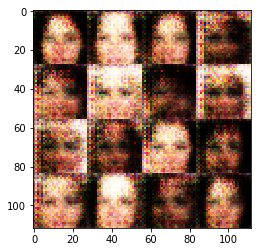

Epoch 1/1... Discriminator Loss: 0.7689... Generator Loss: 1.9267
Epoch 1/1... Discriminator Loss: 0.7273... Generator Loss: 1.4001
Epoch 1/1... Discriminator Loss: 0.5689... Generator Loss: 1.5593
Epoch 1/1... Discriminator Loss: 0.6960... Generator Loss: 1.3934
Epoch 1/1... Discriminator Loss: 1.2882... Generator Loss: 0.4125
Epoch 1/1... Discriminator Loss: 0.4926... Generator Loss: 1.5178
Epoch 1/1... Discriminator Loss: 0.7327... Generator Loss: 0.8746
Epoch 1/1... Discriminator Loss: 0.5780... Generator Loss: 1.3621
Epoch 1/1... Discriminator Loss: 0.6915... Generator Loss: 1.1516
Epoch 1/1... Discriminator Loss: 0.6512... Generator Loss: 1.3461


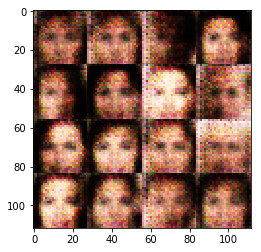

Epoch 1/1... Discriminator Loss: 1.0974... Generator Loss: 0.6510
Epoch 1/1... Discriminator Loss: 0.5543... Generator Loss: 1.6564
Epoch 1/1... Discriminator Loss: 0.5884... Generator Loss: 1.2935
Epoch 1/1... Discriminator Loss: 0.8234... Generator Loss: 0.7910
Epoch 1/1... Discriminator Loss: 0.4404... Generator Loss: 1.4719
Epoch 1/1... Discriminator Loss: 0.6079... Generator Loss: 0.9980
Epoch 1/1... Discriminator Loss: 0.6307... Generator Loss: 1.2104
Epoch 1/1... Discriminator Loss: 0.9700... Generator Loss: 0.6959
Epoch 1/1... Discriminator Loss: 0.6959... Generator Loss: 0.8996
Epoch 1/1... Discriminator Loss: 1.0109... Generator Loss: 0.6324


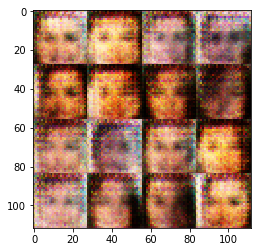

Epoch 1/1... Discriminator Loss: 0.7429... Generator Loss: 2.0043
Epoch 1/1... Discriminator Loss: 0.8301... Generator Loss: 3.2465
Epoch 1/1... Discriminator Loss: 0.8064... Generator Loss: 1.2240
Epoch 1/1... Discriminator Loss: 0.7236... Generator Loss: 1.1414
Epoch 1/1... Discriminator Loss: 0.7036... Generator Loss: 1.7713
Epoch 1/1... Discriminator Loss: 0.8474... Generator Loss: 0.7552
Epoch 1/1... Discriminator Loss: 0.5204... Generator Loss: 1.7237
Epoch 1/1... Discriminator Loss: 0.8458... Generator Loss: 0.8146
Epoch 1/1... Discriminator Loss: 0.8066... Generator Loss: 1.1123
Epoch 1/1... Discriminator Loss: 1.1326... Generator Loss: 0.5586


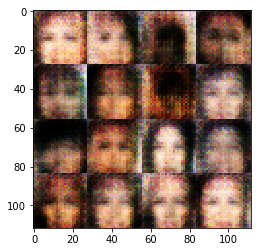

Epoch 1/1... Discriminator Loss: 0.7040... Generator Loss: 1.4381
Epoch 1/1... Discriminator Loss: 0.8646... Generator Loss: 0.8422
Epoch 1/1... Discriminator Loss: 0.5047... Generator Loss: 1.7472
Epoch 1/1... Discriminator Loss: 0.8222... Generator Loss: 1.3403
Epoch 1/1... Discriminator Loss: 0.6019... Generator Loss: 1.6229
Epoch 1/1... Discriminator Loss: 0.7667... Generator Loss: 0.8331
Epoch 1/1... Discriminator Loss: 1.0429... Generator Loss: 0.7029
Epoch 1/1... Discriminator Loss: 1.2329... Generator Loss: 0.4682
Epoch 1/1... Discriminator Loss: 1.0430... Generator Loss: 0.5505
Epoch 1/1... Discriminator Loss: 0.7572... Generator Loss: 1.5338


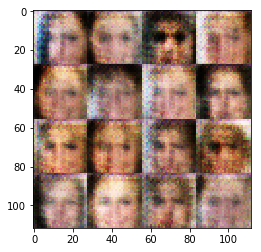

Epoch 1/1... Discriminator Loss: 0.8254... Generator Loss: 1.3959
Epoch 1/1... Discriminator Loss: 0.8054... Generator Loss: 1.8800
Epoch 1/1... Discriminator Loss: 1.0988... Generator Loss: 0.6369
Epoch 1/1... Discriminator Loss: 0.7753... Generator Loss: 1.1284
Epoch 1/1... Discriminator Loss: 1.4945... Generator Loss: 0.3034
Epoch 1/1... Discriminator Loss: 1.2607... Generator Loss: 0.4697
Epoch 1/1... Discriminator Loss: 1.1293... Generator Loss: 0.6335
Epoch 1/1... Discriminator Loss: 0.9246... Generator Loss: 1.7505
Epoch 1/1... Discriminator Loss: 1.0239... Generator Loss: 0.9906
Epoch 1/1... Discriminator Loss: 0.8319... Generator Loss: 0.8303


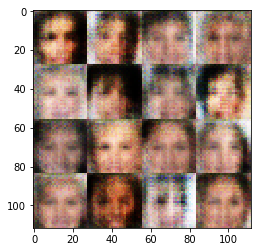

Epoch 1/1... Discriminator Loss: 0.8890... Generator Loss: 1.1324
Epoch 1/1... Discriminator Loss: 1.0753... Generator Loss: 0.6719
Epoch 1/1... Discriminator Loss: 0.8617... Generator Loss: 1.5374
Epoch 1/1... Discriminator Loss: 0.8750... Generator Loss: 0.8880
Epoch 1/1... Discriminator Loss: 0.9971... Generator Loss: 0.6711
Epoch 1/1... Discriminator Loss: 1.1447... Generator Loss: 0.4768
Epoch 1/1... Discriminator Loss: 1.0170... Generator Loss: 0.6611
Epoch 1/1... Discriminator Loss: 0.8710... Generator Loss: 0.8523
Epoch 1/1... Discriminator Loss: 1.0200... Generator Loss: 0.7393
Epoch 1/1... Discriminator Loss: 0.9843... Generator Loss: 0.9260


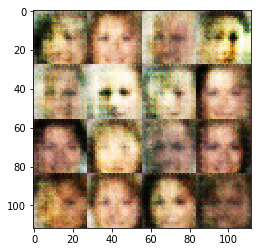

Epoch 1/1... Discriminator Loss: 0.4948... Generator Loss: 1.3557
Epoch 1/1... Discriminator Loss: 0.7366... Generator Loss: 1.1756
Epoch 1/1... Discriminator Loss: 0.9484... Generator Loss: 0.7896
Epoch 1/1... Discriminator Loss: 0.9620... Generator Loss: 1.7476
Epoch 1/1... Discriminator Loss: 1.4006... Generator Loss: 0.3645
Epoch 1/1... Discriminator Loss: 0.7283... Generator Loss: 1.2154
Epoch 1/1... Discriminator Loss: 0.7959... Generator Loss: 1.0871
Epoch 1/1... Discriminator Loss: 0.7793... Generator Loss: 0.9005
Epoch 1/1... Discriminator Loss: 1.0998... Generator Loss: 0.5193
Epoch 1/1... Discriminator Loss: 1.2650... Generator Loss: 0.4656


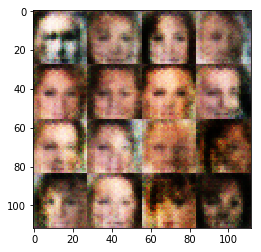

Epoch 1/1... Discriminator Loss: 0.7198... Generator Loss: 1.1947
Epoch 1/1... Discriminator Loss: 1.0863... Generator Loss: 0.5975
Epoch 1/1... Discriminator Loss: 0.5754... Generator Loss: 1.7945
Epoch 1/1... Discriminator Loss: 0.8856... Generator Loss: 0.7775
Epoch 1/1... Discriminator Loss: 0.6128... Generator Loss: 1.2963
Epoch 1/1... Discriminator Loss: 0.8996... Generator Loss: 0.7052
Epoch 1/1... Discriminator Loss: 0.2662... Generator Loss: 1.9379
Epoch 1/1... Discriminator Loss: 0.5664... Generator Loss: 2.2828
Epoch 1/1... Discriminator Loss: 0.6697... Generator Loss: 1.9812
Epoch 1/1... Discriminator Loss: 1.4581... Generator Loss: 0.3367


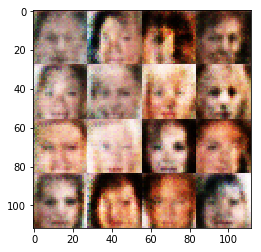

Epoch 1/1... Discriminator Loss: 1.2242... Generator Loss: 0.4764
Epoch 1/1... Discriminator Loss: 0.4049... Generator Loss: 1.8299
Epoch 1/1... Discriminator Loss: 0.6386... Generator Loss: 1.1438
Epoch 1/1... Discriminator Loss: 0.4712... Generator Loss: 2.6896
Epoch 1/1... Discriminator Loss: 0.3998... Generator Loss: 1.4904
Epoch 1/1... Discriminator Loss: 0.3541... Generator Loss: 2.0076
Epoch 1/1... Discriminator Loss: 1.2411... Generator Loss: 0.4159
Epoch 1/1... Discriminator Loss: 0.5051... Generator Loss: 1.2282
Epoch 1/1... Discriminator Loss: 0.8130... Generator Loss: 2.1622
Epoch 1/1... Discriminator Loss: 1.3356... Generator Loss: 2.4046


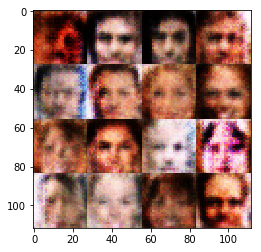

Epoch 1/1... Discriminator Loss: 0.5643... Generator Loss: 1.2728
Epoch 1/1... Discriminator Loss: 1.1026... Generator Loss: 0.5302
Epoch 1/1... Discriminator Loss: 1.0679... Generator Loss: 2.7436
Epoch 1/1... Discriminator Loss: 0.8245... Generator Loss: 0.7366
Epoch 1/1... Discriminator Loss: 0.5889... Generator Loss: 1.8028
Epoch 1/1... Discriminator Loss: 0.9989... Generator Loss: 2.7509
Epoch 1/1... Discriminator Loss: 0.4213... Generator Loss: 1.5538
Epoch 1/1... Discriminator Loss: 0.4184... Generator Loss: 1.5531
Epoch 1/1... Discriminator Loss: 0.4497... Generator Loss: 1.5691
Epoch 1/1... Discriminator Loss: 0.2498... Generator Loss: 2.6307


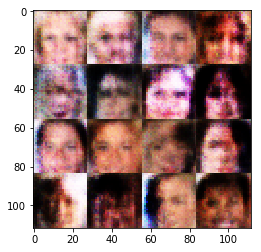

Epoch 1/1... Discriminator Loss: 0.7514... Generator Loss: 0.9248
Epoch 1/1... Discriminator Loss: 0.4864... Generator Loss: 1.5264
Epoch 1/1... Discriminator Loss: 0.9386... Generator Loss: 0.6118
Epoch 1/1... Discriminator Loss: 0.5982... Generator Loss: 1.5093
Epoch 1/1... Discriminator Loss: 1.6207... Generator Loss: 0.2502
Epoch 1/1... Discriminator Loss: 0.6520... Generator Loss: 1.0334
Epoch 1/1... Discriminator Loss: 0.4540... Generator Loss: 1.3302
Epoch 1/1... Discriminator Loss: 0.3296... Generator Loss: 2.2630
Epoch 1/1... Discriminator Loss: 0.2174... Generator Loss: 1.8836
Epoch 1/1... Discriminator Loss: 0.3785... Generator Loss: 2.4655


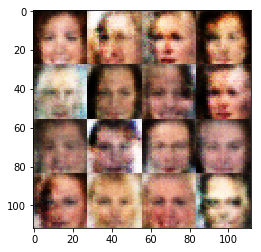

Epoch 1/1... Discriminator Loss: 0.3595... Generator Loss: 1.8761
Epoch 1/1... Discriminator Loss: 0.2799... Generator Loss: 2.4251
Epoch 1/1... Discriminator Loss: 1.1842... Generator Loss: 0.4417
Epoch 1/1... Discriminator Loss: 0.8595... Generator Loss: 0.7622
Epoch 1/1... Discriminator Loss: 0.3260... Generator Loss: 2.1210
Epoch 1/1... Discriminator Loss: 0.6409... Generator Loss: 1.1121
Epoch 1/1... Discriminator Loss: 0.3334... Generator Loss: 2.7854
Epoch 1/1... Discriminator Loss: 0.7337... Generator Loss: 1.6927
Epoch 1/1... Discriminator Loss: 2.4322... Generator Loss: 0.1031
Epoch 1/1... Discriminator Loss: 1.2996... Generator Loss: 0.4057


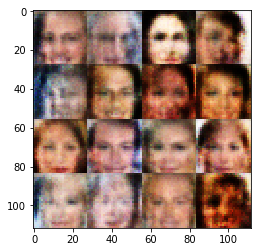

Epoch 1/1... Discriminator Loss: 0.7630... Generator Loss: 0.7655
Epoch 1/1... Discriminator Loss: 0.5063... Generator Loss: 1.9672
Epoch 1/1... Discriminator Loss: 0.5575... Generator Loss: 1.3487
Epoch 1/1... Discriminator Loss: 0.3096... Generator Loss: 4.2613


In [ ]:
batch_size = 64
z_dim = 128
learning_rate = 0.0001
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.